## Installing Packages

In [1]:
!git config --global user.email "buvoligina@gmail.com"
!git config --global user.name "gbuvoli"
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/tdg_datasets/SaberPRO_project_master
!git remote set-url origin https://github.com/gbuvoli/SaberPRO_project.git

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/tdg_datasets/SaberPRO_project_master


In [2]:
%cd /content/drive/MyDrive/tdg_datasets/SaberPRO_project_master
%run myfunctions.py

/content/drive/MyDrive/tdg_datasets/SaberPRO_project_master


In [3]:
#echo: false
#|include: false
from myfunctions import *
myimports
import gc

In [4]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

fatal: destination path 'rapidsai-csp-utils' already exists and is not an empty directory.
Installing RAPIDS remaining 24.10.* libraries
Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com

        ***********************************************************************
        The pip install of RAPIDS is complete.
        
        Please do not run any further installation from the conda based installation methods, as they may cause issues!
        
        Please ensure that you're pulling from the git repo to remain updated with the latest working install scripts.

        Troubleshooting:
            - If there is an installation failure, please check back on RAPIDSAI owned templates/notebooks to see how to update your personal files. 
            - If an installation failure persists when using the latest script, please make an issue on https://github.com/rapidsai-community/rapidsai-csp-utils
        ****************************************************************

In [5]:
import cudf
import cuml
import cupy as cp

import cudf.pandas  # pandas operations now use the GPU!

import pandas as pd
%load_ext cudf.pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Configurar Seaborn para que use la paleta "viridis" como predeterminado
sns.set_palette("viridis")

# Configurar el estilo de Seaborn (opcional, para mantener un estilo uniforme)
sns.set_style("whitegrid")

# Ajustar el tamaño de las figuras predeterminado (opcional)
plt.rcParams["figure.figsize"] = (10, 6)

# Establecer opciones para mostrar todas las filas y columnas sin truncar
pd.options.display.max_rows = None  # Muestra todas las filas
pd.options.display.max_columns = None  # Muestra todas las columnas



## cargue de archivos

Cargamos los datasets con la población total de estudiantes que presentaron la prueba SABER PRO entre 2016 y 2024, su información sociodemográfica y sus resultados, sin embargo, es necesario combinarlos ambos para obtener mayor información sociodemográfica y de resultados de las pruebas.

In [6]:
data2018_24=pd.read_csv('/content/drive/MyDrive/tdg_datasets/Saber_Pro_20241022.csv')
data2016_22 =pd.read_csv('/content/drive/MyDrive/tdg_datasets/poblacion2016-2022.csv')
data2016_22.head()

,PERIODO,ESTU_CONSECUTIVO,ESTU_CODDANE_COLE_TERMINO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_COMOCAPACITOEXAMENSB11,ESTU_SEMESTRECURSA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_HORASSEMANATRABAJA,INST_COD_INSTITUCION,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,ESTU_SNIES_PRGMACADEMICO,GRUPOREFERENCIA,ESTU_PRGM_CODMUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NUCLEO_PREGRADO,ESTU_INST_CODMUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITAT_DESEM,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_DESEM,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_DESEM,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,PUNT_GLOBAL,filter_$,ZPUNT_GLOBAL,ZSco01
0,20203.0,EK202030341029,NaN,NaN,NaN,NaN,Secundaria (Bachillerato) completa,Educación profesional incompleta,Entre 11 y 20 horas,1202.0,UNIVERSIDAD DEL ATLANTICO-BARRANQUILLA,LICENCIATURA EN HUMANIDADES Y LENGUA CASTELLANA,106170.0,EDUCACIÓN,8001.0,ATLÁNTICO,EDUCACIÓN,8001.0,ATLÁNTICO,UNIVERSIDAD,171.0,3.0,171.0,3.0,154.0,2.0,169.0,A2,131.0,2.0,159.0,Not Selected,0.462851,0.822211
1,20203.0,EK202030286711,NaN,NaN,NaN,NaN,Técnica o tecnológica incompleta,Técnica o tecnológica incompleta,Entre 21 y 30 horas,1202.0,UNIVERSIDAD DEL ATLANTICO-BARRANQUILLA,LICENCIATURA EN HUMANIDADES Y LENGUA CASTELLANA,106170.0,EDUCACIÓN,8001.0,ATLÁNTICO,EDUCACIÓN,8001.0,ATLÁNTICO,UNIVERSIDAD,149.0,2.0,166.0,3.0,158.0,3.0,134.0,A1,165.0,3.0,154.0,Not Selected,0.260342,0.616542
2,20203.0,EK202030340888,NaN,NaN,NaN,NaN,Educación profesional incompleta,Técnica o tecnológica incompleta,Más de 30 horas,1202.0,UNIVERSIDAD DEL ATLANTICO-BARRANQUILLA,LICENCIATURA EN HUMANIDADES Y LENGUA CASTELLANA,106170.0,EDUCACIÓN,8001.0,ATLÁNTICO,EDUCACIÓN,8001.0,ATLÁNTICO,UNIVERSIDAD,159.0,3.0,177.0,3.0,153.0,2.0,161.0,A2,135.0,2.0,157.0,Not Selected,0.381847,0.739944
3,20203.0,EK202030233707,NaN,NaN,NaN,NaN,Primaria incompleta,Primaria incompleta,Menos de 10 horas,1202.0,UNIVERSIDAD DEL ATLANTICO-BARRANQUILLA,LICENCIATURA EN HUMANIDADES Y LENGUA CASTELLANA,106170.0,EDUCACIÓN,8001.0,ATLÁNTICO,EDUCACIÓN,8001.0,ATLÁNTICO,UNIVERSIDAD,118.0,1.0,124.0,1.0,131.0,2.0,101.0,A-,119.0,2.0,119.0,Not Selected,-1.157215,-0.823144
4,20203.0,EK202030312054,NaN,Menos de 500 mil,Repasó por cuenta propia,8.0,Técnica o tecnológica completa,Técnica o tecnológica completa,Entre 11 y 20 horas,1202.0,UNIVERSIDAD DEL ATLANTICO-BARRANQUILLA,LICENCIATURA EN HUMANIDADES Y LENGUA CASTELLANA,106170.0,EDUCACIÓN,8001.0,ATLÁNTICO,EDUCACIÓN,8001.0,ATLÁNTICO,UNIVERSIDAD,149.0,2.0,161.0,3.0,191.0,3.0,167.0,A2,0.0,NaN,134.0,Not Selected,-0.549690,-0.206136


In [9]:
data2018_24.head()

,PERIODO,ESTU_CONSECUTIVO,ESTU_TIPODOCUMENTO,ESTU_PAIS_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_MCPIO_RESIDE,ESTU_CODDANE_COLE_TERMINO,ESTU_COD_COLE_MCPIO_TERMINO,ESTU_COD_DEPTO_PRESENTACION,INST_COD_INSTITUCION,INST_NOMBRE_INSTITUCION,INST_CARACTER_ACADEMICO,ESTU_NUCLEO_PREGRADO,ESTU_INST_DEPARTAMENTO,ESTU_INST_CODMUNICIPIO,ESTU_INST_MUNICIPIO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_PRGM_CODMUNICIPIO,ESTU_PRGM_MUNICIPIO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_DEPTO_PRESENTACION,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_HORASSEMANATRABAJA,ESTU_SNIES_PRGMACADEMICO,ESTU_PRIVADO_LIBERTAD,ESTU_NACIONALIDAD,ESTU_ESTUDIANTE,ESTU_GENERO,ESTU_COLE_TERMINO,ESTU_PAGOMATRICULAPADRES,ESTU_ESTADOINVESTIGACION,ESTU_FECHANACIMIENTO,ESTU_PAGOMATRICULAPROPIO,ESTU_TIPODOCUMENTOSB11,FAMI_EDUCACIONPADRE,FAMI_TIENEAUTOMOVIL,FAMI_TIENELAVADORA,FAMI_ESTRATOVIVIENDA,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_EDUCACIONMADRE,INST_ORIGEN,MOD_RAZONA_CUANTITAT_PUNT,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_INGLES_DESEM,MOD_LECTURA_CRITICA_PUNT,MOD_INGLES_PUNT,MOD_COMPETEN_CIUDADA_PUNT
0,20183,EK201830011083,CC,COLOMBIA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,NaN,NaN,11.0,2834,UNIVERSITARIA AGUSTINIANA- UNIAGUSTINIANA-BOGO...,INSTITUCIÓN UNIVERSITARIA,ADMINISTRACIÓN,BOGOTÁ,11001,BOGOTÁ D.C.,HOTELERIA Y TURISMO,BOGOTÁ,11001,BOGOTÁ D.C.,UNIVERSITARIO,PRESENCIAL,Entre 2.5 millones y menos de 4 millones,BOGOTÁ,11001.0,BOGOTÁ D.C.,No,No,Entre 11 y 20 horas,54487.0,N,COLOMBIA,ESTUDIANTE,F,NaN,Si,PUBLICAR,18/09/1997,No,CC,Primaria completa,Si,Si,Estrato 2,Si,Si,Secundaria (Bachillerato) incompleta,NO OFICIAL - CORPORACIÓN,161,174.0,3.0,A2,139,161.0,128
1,20183,EK201830053875,CC,COLOMBIA,76.0,VALLE,76736.0,SEVILLA,NaN,NaN,76.0,1203,UNIVERSIDAD DEL VALLE-CALI,UNIVERSIDAD,CONTADURÍA PUBLICA,VALLE,76001,CALI,CONTADURIA PUBLICA,VALLE,76834,TULUÁ,UNIVERSITARIO,PRESENCIAL,Menos de 500 mil,VALLE,76834.0,TULUÁ,No,No,Entre 21 y 30 horas,52346.0,N,COLOMBIA,ESTUDIANTE,M,NaN,Si,PUBLICAR,24/07/1995,No,TI,Primaria incompleta,No,Si,Estrato 2,Si,Si,Secundaria (Bachillerato) incompleta,OFICIAL DEPARTAMENTAL,147,170.0,3.0,B1,171,188.0,182
2,20183,EK201830167993,CC,COLOMBIA,73.0,TOLIMA,73001.0,IBAGUÉ,1.730010e+11,73001.0,73.0,2829,CORPORACION UNIVERSITARIA MINUTO DE DIOS -UNIM...,INSTITUCIÓN UNIVERSITARIA,CONTADURÍA PUBLICA,BOGOTÁ,11001,BOGOTÁ D.C.,CONTADURÍA PÚBLICA,BOGOTÁ,11001,BOGOTÁ D.C.,UNIVERSITARIO,DISTANCIA,Entre 1 millón y menos de 2.5 millones,TOLIMA,73001.0,IBAGUÉ,No,No,Más de 30 horas,91334.0,N,COLOMBIA,ESTUDIANTE,M,SEDE 1 GERMAN PARDO,No,PUBLICAR,18/03/1994,Si,CC,No Aplica,No,Si,Estrato 2,Si,Si,No sabe,NO OFICIAL - CORPORACIÓN,142,77.0,1.0,A1,124,130.0,153
3,20183,EK201830168158,CC,COLOMBIA,68.0,SANTANDER,68081.0,BARRANCABERMEJA,1.680810e+11,68081.0,68.0,2207,INSTITUTO UNIVERSITARIO DE LA PAZ-BARRANCABERMEJA,INSTITUCIÓN UNIVERSITARIA,"INGENIERÍA AMBIENTAL, SANITARIA Y AFINES",SANTANDER,68081,BARRANCABERMEJA,INGENIERIA AMBIENTAL Y DE SANEAMIENTO,SANTANDER,68081,BARRANCABERMEJA,UNIVERSITARIO,PRESENCIAL,Entre 500 mil y menos de 1 millón,SANTANDER,68081.0,BARRANCABERMEJA,No,No,0,3127.0,N,COLOMBIA,ESTUDIANTE,M,INSTITUTO TECNICO INDUSTRIAL,Si,PUBLICAR,29/06/1997,No,TI,Postgrado,No,Si,Estrato 2,Si,Si,Técnica o tecnológica completa,OFICIAL DEPARTAMENTAL,185,157.0,3.0,-A1,178,106.0,169
4,20183,EK201830164354,CC,COLOMBIA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,1.110010e+11,11001.0,11.0,1208,UNIVERSIDAD DEL QUINDIO-ARMENIA,UNIVERSIDAD,"BIBLIOTECOLOGÍA, OTROS DE CIENCIAS SOCIALES Y ...",QUINDIO,63001,ARMENIA,CIENCIAS DE LA INFORMACION Y LA DOCUMENTACION,QUINDIO,63001,ARMENIA,UNIVERSITARIO,DISTANCIA VITUAL,Entre 500 mil y menos de 1 millón,BOGOTÁ,11001.0,BOGOTÁ D.C.,No,No,Entre 21 y 30 horas,833.0,N,COLOMBIA,ESTUDIANTE,F,CENT EDUC DIST NUEVA CONSTITUCION,No,PUBLICAR,23/09/1987,Si,TI,Educación profesional completa,No,Si,Estrato 3,Si,Si,Educación

In [7]:
# Seleccionamos todas las columnas de df1 y excluimos las duplicadas de df2
df1_columns = data2016_22.columns
df2_columns = data2018_24.columns.difference(df1_columns).to_list() + ['ESTU_CONSECUTIVO']  # Conservamos la clave para el merge

# Realizamos el merge usando 'ESTU_CONSECUTIVO' como clave y un inner join
df_combined = pd.merge(data2016_22[df1_columns], data2018_24[df2_columns], on='ESTU_CONSECUTIVO', how='inner')
df_combined.to_csv('df_combined.csv', index=False)
# Verificamos el resultado
print("Número de registros combinados:", df_combined.shape[0])
print("Número de columnas en el dataset combinado:", df_combined.shape[1])



Número de registros combinados: 1220552
Número de columnas en el dataset combinado: 67


In [12]:
df_combined[df_combined['ESTU_CONSECUTIVO']=='EK202250165035']

,PERIODO,ESTU_CONSECUTIVO,ESTU_CODDANE_COLE_TERMINO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_COMOCAPACITOEXAMENSB11,ESTU_SEMESTRECURSA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_HORASSEMANATRABAJA,INST_COD_INSTITUCION,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,ESTU_SNIES_PRGMACADEMICO,GRUPOREFERENCIA,ESTU_PRGM_CODMUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NUCLEO_PREGRADO,ESTU_INST_CODMUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITAT_DESEM,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_DESEM,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_DESEM,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,PUNT_GLOBAL,filter_$,ZPUNT_GLOBAL,ZSco01,ESTU_COD_COLE_MCPIO_TERMINO,ESTU_COD_DEPTO_PRESENTACION,ESTU_COD_MCPIO_PRESENTACION,ESTU_COD_RESIDE_DEPTO,ESTU_COD_RESIDE_MCPIO,ESTU_COLE_TERMINO,ESTU_DEPTO_PRESENTACION,ESTU_DEPTO_RESIDE,ESTU_ESTADOINVESTIGACION,ESTU_ESTUDIANTE,ESTU_FECHANACIMIENTO,ESTU_GENERO,ESTU_INST_MUNICIPIO,ESTU_MCPIO_PRESENTACION,ESTU_MCPIO_RESIDE,ESTU_METODO_PRGM,ESTU_NACIONALIDAD,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_PAIS_RESIDE,ESTU_PRGM_MUNICIPIO,ESTU_PRIVADO_LIBERTAD,ESTU_TIPODOCUMENTO,ESTU_TIPODOCUMENTOSB11,FAMI_ESTRATOVIVIENDA,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,INST_ORIGEN
1216775,20225.0,EK202250165035,3.732680e+11,Entre 1 millón y menos de 2.5 millones,Repasó por cuenta propia,9.0,Primaria completa,Primaria completa,Más de 30 horas,4110.0,INSTITUTO TOLIMENSE DE FORMACION TECNICA PROFE...,TRABAJO SOCIAL,102626.0,CIENCIAS SOCIALES,73268.0,TOLIMA,"SOCIOLOGÍA, TRABAJO SOCIAL Y AFINES",73268.0,TOLIMA,TÉCNICA PROFESIONAL,98.0,1.0,107.0,1.0,101.0,1.0,98.0,A1,153.0,3.0,111.0,Not Selected,-1.26191,-0.923267,73268.0,73.0,73268.0,73.0,73268.0,"INSTITUTO DE EDUCACION FORMAL ""CECONTEC"" - SED...",TOLIMA,TOLIMA,PUBLICAR,ESTUDIANTE,23/08/1999,F,ESPINAL,ESPINAL,ESPINAL,PRESENCIAL,COLOMBIA,UNIVERSITARIO,Si,No,No,No,COLOMBIA,ESPINAL,N,CC,TI,Estrato 2,No,No,No,Si,OFICIAL NACIONAL


In [8]:
uninorte= df_combined[df_combined['INST_NOMBRE_INSTITUCION']=='UNIVERSIDAD DEL NORTE-BARRANQUILLA']
uninorte.to_csv('data_uninorte_2016-2024.csv', index=False)

print(uninorte.shape)
uninorte.sample(5)

(11587, 67)


,PERIODO,ESTU_CONSECUTIVO,ESTU_CODDANE_COLE_TERMINO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_COMOCAPACITOEXAMENSB11,ESTU_SEMESTRECURSA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_HORASSEMANATRABAJA,INST_COD_INSTITUCION,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,ESTU_SNIES_PRGMACADEMICO,GRUPOREFERENCIA,ESTU_PRGM_CODMUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NUCLEO_PREGRADO,ESTU_INST_CODMUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITAT_DESEM,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_DESEM,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_DESEM,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,PUNT_GLOBAL,filter_$,ZPUNT_GLOBAL,ZSco01,ESTU_COD_COLE_MCPIO_TERMINO,ESTU_COD_DEPTO_PRESENTACION,ESTU_COD_MCPIO_PRESENTACION,ESTU_COD_RESIDE_DEPTO,ESTU_COD_RESIDE_MCPIO,ESTU_COLE_TERMINO,ESTU_DEPTO_PRESENTACION,ESTU_DEPTO_RESIDE,ESTU_ESTADOINVESTIGACION,ESTU_ESTUDIANTE,ESTU_FECHANACIMIENTO,ESTU_GENERO,ESTU_INST_MUNICIPIO,ESTU_MCPIO_PRESENTACION,ESTU_MCPIO_RESIDE,ESTU_METODO_PRGM,ESTU_NACIONALIDAD,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_PAIS_RESIDE,ESTU_PRGM_MUNICIPIO,ESTU_PRIVADO_LIBERTAD,ESTU_TIPODOCUMENTO,ESTU_TIPODOCUMENTOSB11,FAMI_ESTRATOVIVIENDA,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,INST_ORIGEN
491896,20225.0,EK202250114875,3.200010e+11,Más de 7 millones,Repasó por cuenta propia,10.0,NaN,NaN,NaN,1713.0,UNIVERSIDAD DEL NORTE-BARRANQUILLA,DERECHO,1271.0,DERECHO,8001.0,ATLANTICO,DERECHO Y AFINES,8001.0,ATLANTICO,UNIVERSIDAD,167.0,3.0,208.0,4.0,192.0,3.0,220.0,B2,196.0,4.0,197.0,Selected,1.932096,1.695092,20001.0,11.0,11001.0,44.0,44378.0,COL. GIMNASIO DEL NORTE,BOGOTÁ,LA GUAJIRA,PUBLICAR,ESTUDIANTE,23/04/2001,F,BARRANQUILLA,BOGOTÁ D.C.,HATONUEVO,PRESENCIAL,COLOMBIA,UNIVERSITARIO,No,Si,No,No,COLOMBIA,BARRANQUILLA,N,CC,TI,NaN,NaN,NaN,NaN,NaN,NO OFICIAL - FUNDACIÓN
446844,20203.0,EK202030260357,NaN,Entre 5.5 millones y menos de 7 millones,Repasó por cuenta propia,10.0,Educación profesional incompleta,NaN,NaN,1713.0,UNIVERSIDAD DEL NORTE-BARRANQUILLA,DERECHO,1271.0,DERECHO,8001.0,ATLÁNTICO,DERECHO Y AFINES,8001.0,ATLÁNTICO,UNIVERSIDAD,119.0,1.0,142.0,2.0,164.0,3.0,170.0,A2,158.0,3.0,151.0,Selected,0.138838,NaN,NaN,11.0,11001.0,8.0,8001.0,NaN,BOGOTÁ,ATLANTICO,PUBLICAR,ESTUDIANTE,09/01/1999,F,BARRANQUILLA,BOGOTÁ D.C.,BARRANQUILLA,PRESENCIAL,COLOMBIA,UNIVERSITARIO,Si,No,No,No,COLOMBIA,BARRANQUILLA,N,CC,CC,NaN,NaN,NaN,NaN,NaN,NO OFICIAL - FUNDACIÓN
446869,20203.0,EK202030260348,1.080010e+11,Más de 7 millones,Tomó un curso de preparación,10.0,Postgrado,Técnica o tecnológica completa,0,1713.0,UNIVERSIDAD DEL NORTE-BARRANQUILLA,DERECHO,1271.0,DERECHO,8001.0,ATLÁNTICO,DERECHO Y AFINES,8001.0,ATLÁNTICO,UNIVERSIDAD,180.0,3.0,219.0,4.0,174.0,3.0,200.0,B2,300.0,4.0,215.0,Selected,2.730942,NaN,8001.0,11.0,11001.0,8.0,8001.0,INSTITUCION EDUCATIVA DISTRITAL CARLOS MEISEL ...,BOGOTÁ,ATLANTICO,PUBLICAR,ESTUDIANTE,23/02/1999,M,BARRANQUILLA,BOGOTÁ D.C.,BARRANQUILLA,PRESENCIAL,COLOMBIA,UNIVERSITARIO,Si,No,No,No,COLOMBIA,BARRANQUILLA,N,CC,TI,Estrato 1,Si,Si,Si,Si,NO OFICIAL - FUNDACIÓN
990515,20203.0,EK202030201872,3.470010e+11,Más de 7 millones,Tomó un curso de preparación,10.0,Postgrado,Postgrado,0,1713.0,UNIVERSIDAD DEL NORTE-BARRANQUILLA,MEDICINA,1269.0,MEDICINA,8001.0,ATLÁNTICO,MEDICINA,8001.0,ATLÁNTICO,UNIVERSIDAD,193.0,3.0,201.0,4.0,222.0,4.0,300.0,B2,300.0,4.0,243.0,Selected,3.864988,NaN,47001.0,11.0,11001.0,47.0,47001.0,COLEGIO GIMNASIO SANTIAGO DE CALI,BOGOTÁ,MAGDALENA,PUBLICAR,ESTUDIANTE,04/04/1999,M,BARRANQUILLA,BOGOTÁ D.C.,SANTA MARTA,PRESENCIAL,COLOMBIA,UNIVERSITARIO,Si,No,No,No,COLOMBIA,BARRANQUILLA,N,CC,TI,Estrato 4,No,Si,Si,Si,NO OFICIAL - FUNDACIÓN
396659,20212.0,EK202120065369,NaN,Entre 5.5 millones y menos de 7 millones,Repasó por cuenta propia,8.0,Postgrado,Educación profesional completa,Entre 21 y 30 horas,1713.0,UNIVERSIDAD DEL NORTE-B

## EXPLORATORY DATA ANALYSIS

Conozcamos la naturaleza de los datos de cada columna y cuantas categorías tienen

In [14]:
print(f'los datos de poblacion son de tamaño {df_combined.shape}')
print(f'la muestra de UNINORTE es de tamaño {uninorte.shape}')

los datos de poblacion son de tamaño (1220552, 67)
la muestra de UNINORTE es de tamaño (11587, 67)


In [9]:
# Supongamos que tienes varios DataFrames grandes que ya no necesitas
del data2016_22, data2018_24
gc.collect()  # Forzar la liberación de memoria


273

Conociendo los datos del dataset general

In [ ]:
df_combined.describe(include='object')

,ESTU_CONSECUTIVO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_COMOCAPACITOEXAMENSB11,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,...,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,INST_ORIGEN
count,1220552,1208456,1209155,1179257,1178457,...,1144213,1155530,1172918,1152715,1220552
unique,1210065,8,3,12,12,...,2,2,2,2,6
top,EK202250190238,Entre 1 millón y menos de 2.5 millones,Repasó por cuenta propia,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,...,No,Si,Si,Si,NO OFICIAL - CORPORACIÓN
freq,4,350001,815967,227623,250681,...,732037,1048984,1043836,991931,429492


## Evaluación y Manejo de Nulos

<Axes: >

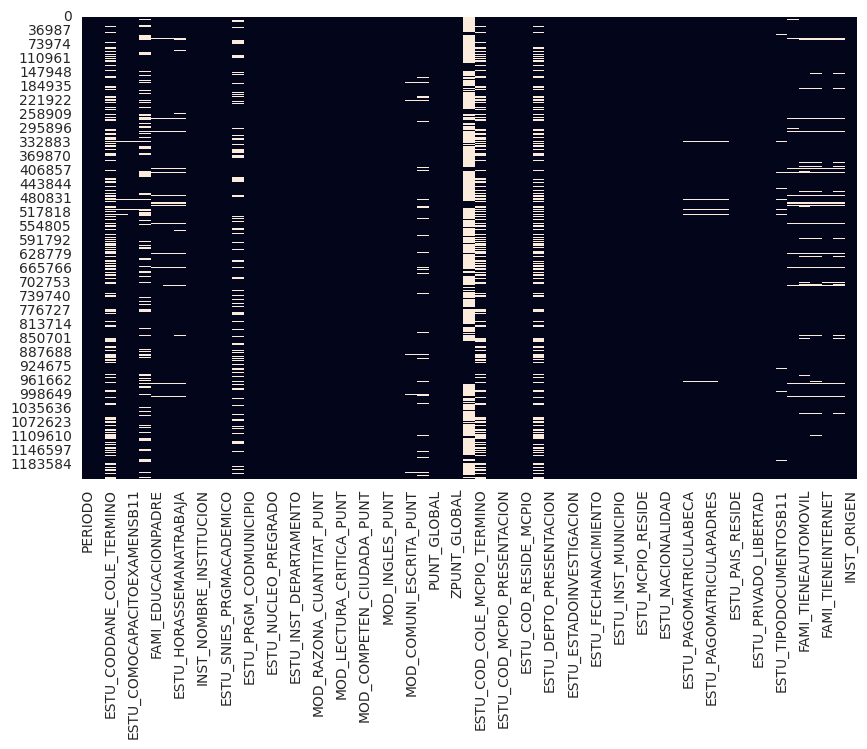

In [ ]:
sns.heatmap(df_combined.isnull(), cbar=False)

In [10]:
df_combined.drop(['ZPUNT_GLOBAL','ESTU_CODDANE_COLE_TERMINO','filter_$','ZSco01' ], axis=1, inplace=True)
uninorte.drop(['filter_$','ZPUNT_GLOBAL','ZSco01','ESTU_CODDANE_COLE_TERMINO'], axis=1, inplace=True)

<ipython-input-10-bba9480fd3f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uninorte.drop(['filter_$','ZPUNT_GLOBAL','ZSco01','ESTU_CODDANE_COLE_TERMINO'], axis=1, inplace=True)


In [ ]:
df_combined.isnull().sum()/df_combined.shape[0]*100

,0
PERIODO,0.000000
ESTU_CONSECUTIVO,0.000000
ESTU_VALORMATRICULAUNIVERSIDAD,0.991027
ESTU_COMOCAPACITOEXAMENSB11,0.933758
ESTU_SEMESTRECURSA,20.703911
FAMI_EDUCACIONPADRE,3.383305
FAMI_EDUCACIONMADRE,3.448849
ESTU_HORASSEMANATRABAJA,4.557856
INST_COD_INSTITUCION,0.000000
INST_NOMBRE_INSTITUCION,0.000000


In [11]:
keep_float=['PUNT_GLOBAL','MOD_COMUNI_ESCRITA_PUNT','MOD_COMPETEN_CIUDADA_PUNT','MOD_LECTURA_CRITICA_PUNT','MOD_RAZONA_CUANTITAT_PUNT','MOD_INGLES_PUNT']
for col in df_combined.columns:
    if col not in keep_float:
        df_combined.fillna({col:'sin_informacion'}, inplace=True)
        df_combined[col]=df_combined[col].astype(str)

In [ ]:
df_combined.isnull().sum()/df_combined.shape[0]*100

,0
PERIODO,0.000000
ESTU_CONSECUTIVO,0.000000
ESTU_VALORMATRICULAUNIVERSIDAD,0.000000
ESTU_COMOCAPACITOEXAMENSB11,0.000000
ESTU_SEMESTRECURSA,0.000000
FAMI_EDUCACIONPADRE,0.000000
FAMI_EDUCACIONMADRE,0.000000
ESTU_HORASSEMANATRABAJA,0.000000
INST_COD_INSTITUCION,0.000000
INST_NOMBRE_INSTITUCION,0.000000


In [20]:
df_combined.dtypes

,0
PERIODO,object
ESTU_CONSECUTIVO,object
ESTU_VALORMATRICULAUNIVERSIDAD,object
ESTU_COMOCAPACITOEXAMENSB11,object
ESTU_SEMESTRECURSA,object
FAMI_EDUCACIONPADRE,object
FAMI_EDUCACIONMADRE,object
ESTU_HORASSEMANATRABAJA,object
INST_COD_INSTITUCION,object
INST_NOMBRE_INSTITUCION,object


In [13]:
cols_low=[]
cols_hight=[]
cols_unica=[]

for col in df_combined.columns:
    if df_combined[col].nunique()==1:
        cols_unica.append(col)
        print(f'La columna {col} tiene categoría unica')
    elif df_combined[col].nunique()<100:
        cols_low.append(col)
        print(df_combined[col].value_counts())
    else:
        cols_hight.append(col)
        print(f'La columna {col} tiene mas de 100 categorías')

print(f'El dataset tiene {len(cols_low)} columnas de baja frecuencia')
print(f'El dataset tiene {len(cols_hight)} columnas de alta frecuencia')
print(f'El dataset tiene {len(cols_unica)} columnas con valores unicos')


PERIODO
20195.0    258028
20212.0    246663
20203.0    245720
20183.0    233740
20225.0    131752
20222.0     97889
20194.0      2076
20213.0      1670
20226.0      1060
20202.0       680
20223.0       674
20184.0       372
20196.0       228
Name: count, dtype: int64
La columna ESTU_CONSECUTIVO tiene mas de 100 categorías
ESTU_VALORMATRICULAUNIVERSIDAD
Entre 1 millón y menos de 2.5 millones      350001
Entre 2.5 millones y menos de 4 millones    220748
Menos de 500 mil                            138714
Entre 500 mil y menos de 1 millón           129272
Entre 4 millones y menos de 5.5 millones    125279
Más de 7 millones                           124028
Entre 5.5 millones y menos de 7 millones     69090
No pagó matrícula                            51324
sin_informacion                              12096
Name: count, dtype: int64
ESTU_COMOCAPACITOEXAMENSB11
Repasó por cuenta propia                    815967
No realizó ninguna prueba de preparación    269095
Tomó un curso de preparación  

In [13]:
keep_float=['PUNT_GLOBAL','MOD_COMUNI_ESCRITA_PUNT','MOD_COMPETEN_CIUDADA_PUNT','MOD_LECTURA_CRITICA_PUNT','MOD_RAZONA_CUANTITAT_PUNT','MOD_INGLES_PUNT']
for col in uninorte.columns:
    if col not in keep_float:
        uninorte.fillna({col:'sin_informacion'}, inplace=True)
        uninorte[col]=uninorte[col].astype(str)

<ipython-input-13-cdc71979cee6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uninorte.fillna({col:'sin_informacion'}, inplace=True)
<ipython-input-13-cdc71979cee6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uninorte[col]=uninorte[col].astype(str)
<ipython-input-13-cdc71979cee6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uninorte.fillna({col:'sin_informacion'}, inp

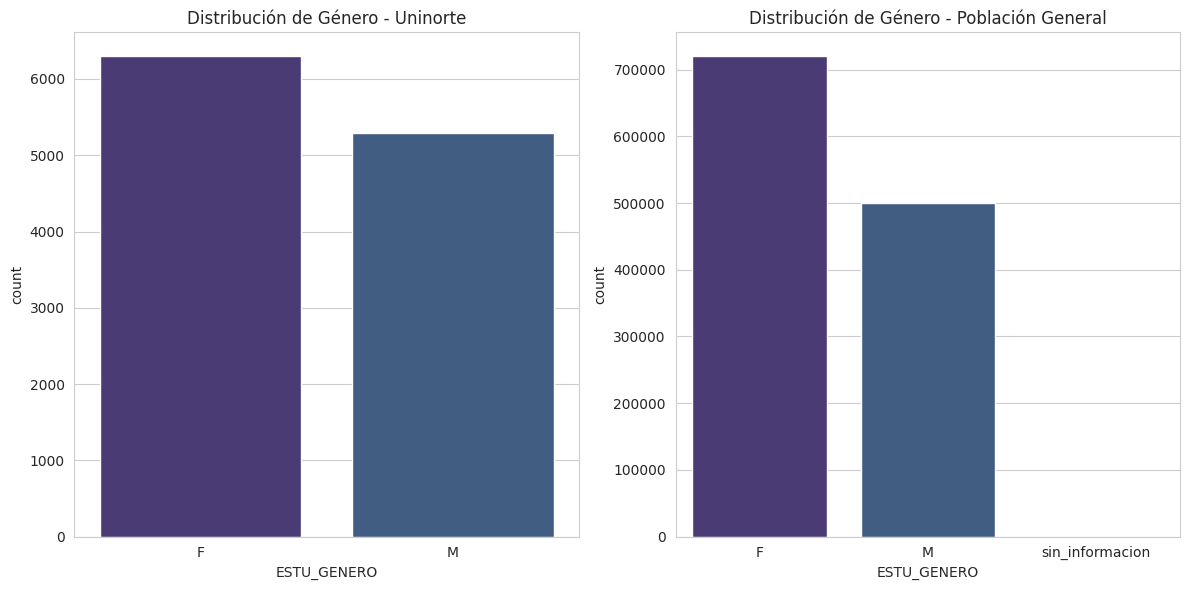

In [25]:
# Obtener las categorías únicas excluyendo nulos y convertirlas a strings
category_order = sorted(df_combined['FAMI_ESTRATOVIVIENDA'].dropna().astype(str).unique())

# Crear un diccionario de colores para cada categoría
palette_dict = dict(zip(category_order, sns.color_palette("viridis", len(category_order))))
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Gráfico para Uninorte
sns.countplot(data=uninorte, x='ESTU_GENERO', hue='ESTU_GENERO', legend=False,  ax=ax[0])
ax[0].set_title('Distribución de Género - Uninorte')

# Gráfico para la población general
sns.countplot(data=df_combined, x='ESTU_GENERO',hue='ESTU_GENERO', legend=False,  ax=ax[1])
ax[1].set_title('Distribución de Género - Población General')

plt.tight_layout()
plt.show()


<ipython-input-26-693b844bf6fe>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha="right")  # Gira las etiquetas del eje x
<ipython-input-26-693b844bf6fe>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right")  # Gira las etiquetas del eje x


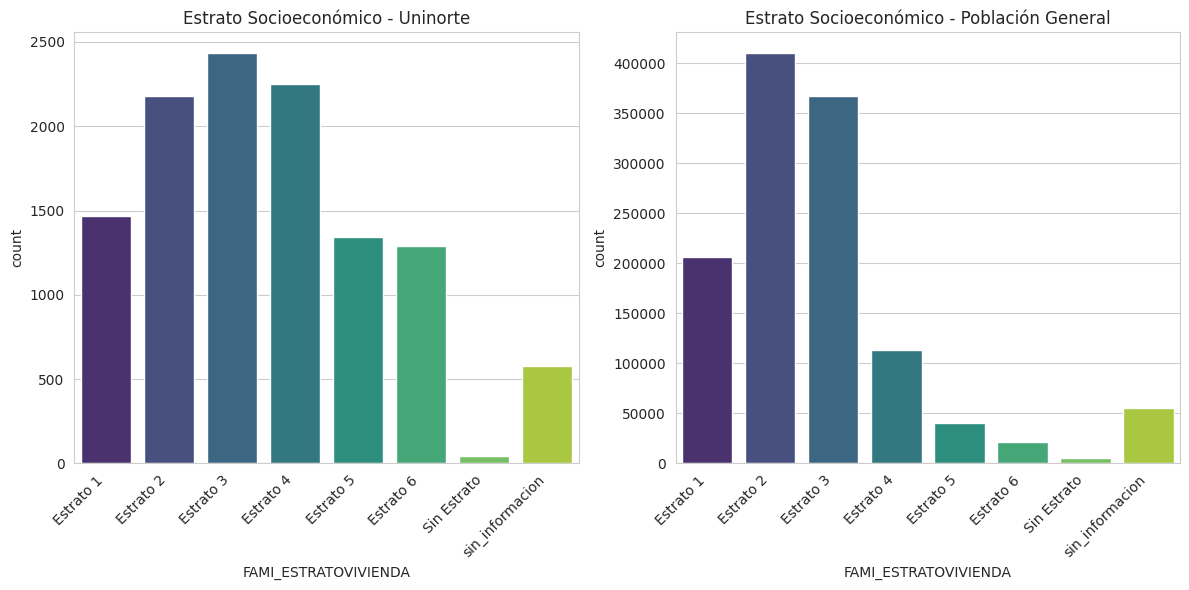

In [26]:
# Obtener las categorías únicas excluyendo nulos y convertirlas a strings
category_order = sorted(df_combined['FAMI_ESTRATOVIVIENDA'].unique())

# Crear un diccionario de colores para cada categoría
palette_dict = dict(zip(category_order, sns.color_palette("viridis", len(category_order))))

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Gráfico para Uninorte
sns.countplot(data=uninorte, x='FAMI_ESTRATOVIVIENDA', hue='FAMI_ESTRATOVIVIENDA',
              order=category_order, palette=palette_dict, ax=ax[0])
ax[0].set_title('Estrato Socioeconómico - Uninorte')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha="right")  # Gira las etiquetas del eje x

# Gráfico para la población general
sns.countplot(data=df_combined, x='FAMI_ESTRATOVIVIENDA', hue='FAMI_ESTRATOVIVIENDA',
              order=category_order, palette=palette_dict, ax=ax[1])
ax[1].set_title('Estrato Socioeconómico - Población General')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right")  # Gira las etiquetas del eje x

plt.tight_layout()
plt.show()




<ipython-input-27-d6158c94f533>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha="right")  # Gira las etiquetas del eje x


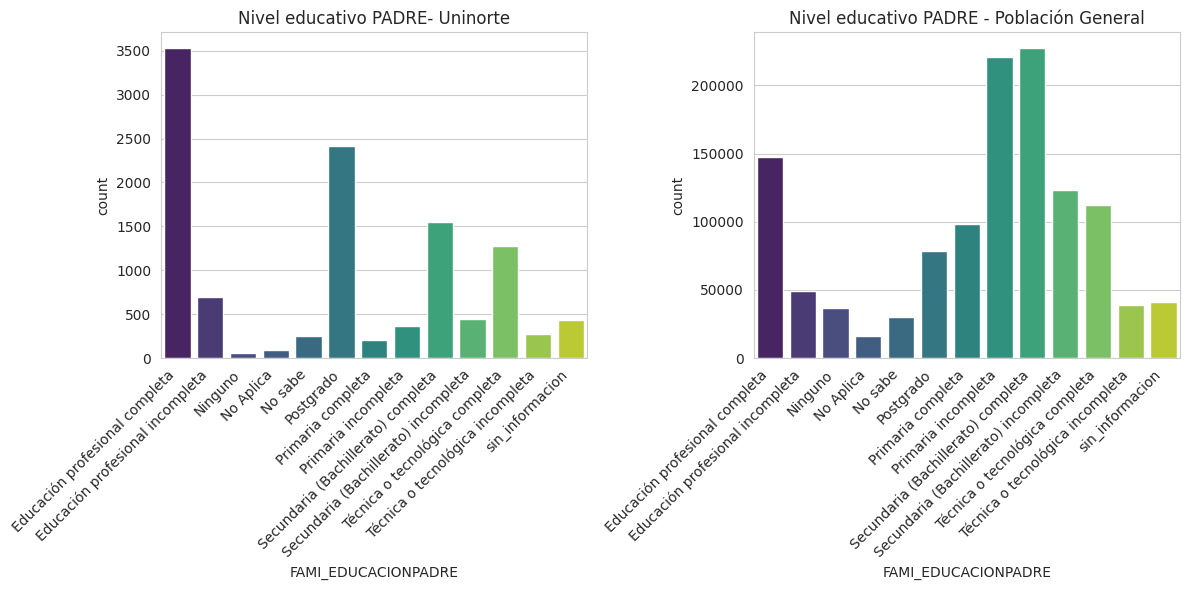

In [27]:
# Obtener las categorías únicas excluyendo nulos y convertirlas a strings
category_order = sorted(df_combined['FAMI_EDUCACIONPADRE'].unique())

# Crear un diccionario de colores para cada categoría
palette_dict = dict(zip(category_order, sns.color_palette("viridis", len(category_order))))

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Gráfico para Uninorte
sns.countplot(data=uninorte, x='FAMI_EDUCACIONPADRE', hue='FAMI_EDUCACIONPADRE',
              order=category_order, palette=palette_dict, ax=ax[0])
ax[0].set_title('Nivel educativo PADRE- Uninorte')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha="right")  # Gira las etiquetas del eje x

# Gráfico para la población general
sns.countplot(data=df_combined, x='FAMI_EDUCACIONPADRE', hue='FAMI_EDUCACIONPADRE',
              order=category_order, palette=palette_dict, ax=ax[1])
ax[1].set_title('Nivel educativo PADRE - Población General')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right")  # Gira las etiquetas del eje x

plt.tight_layout()
plt.show()


<ipython-input-28-8e8b70b77ab4>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha="right")  # Gira las etiquetas del eje x
<ipython-input-28-8e8b70b77ab4>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right")  # Gira las etiquetas del eje x


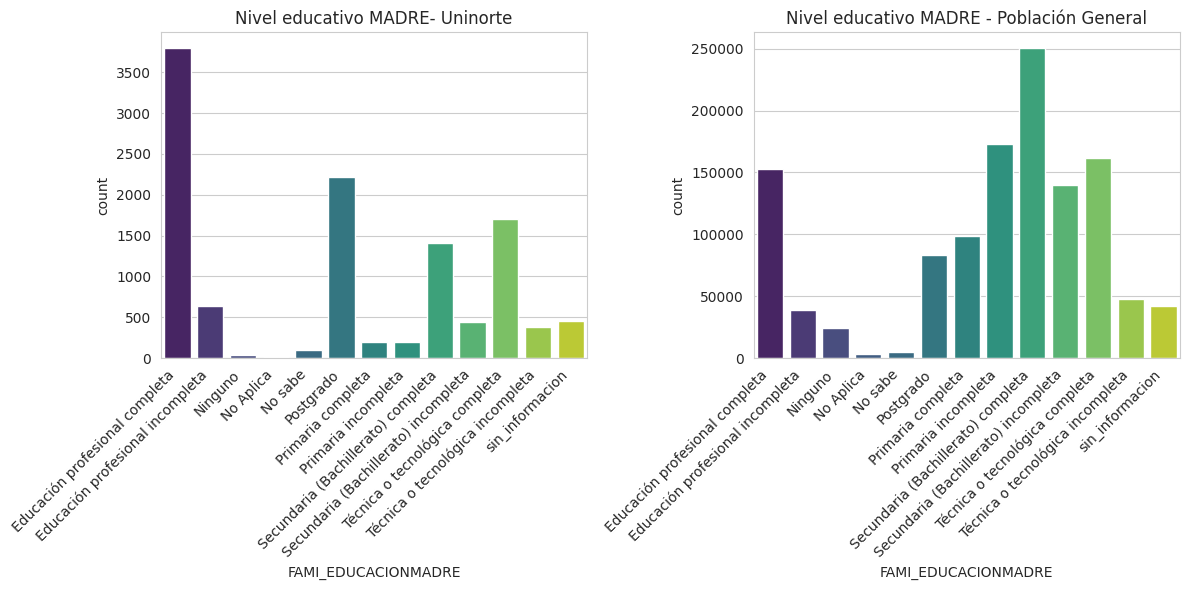

In [28]:
# Obtener las categorías únicas excluyendo nulos y convertirlas a strings
category_order = sorted(df_combined['FAMI_EDUCACIONMADRE'].unique())

# Crear un diccionario de colores para cada categoría
palette_dict = dict(zip(category_order, sns.color_palette("viridis", len(category_order))))

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Gráfico para Uninorte
sns.countplot(data=uninorte, x='FAMI_EDUCACIONMADRE', hue='FAMI_EDUCACIONMADRE',
              order=category_order, palette=palette_dict, ax=ax[0])
ax[0].set_title('Nivel educativo MADRE- Uninorte')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha="right")  # Gira las etiquetas del eje x

# Gráfico para la población general
sns.countplot(data=df_combined, x='FAMI_EDUCACIONMADRE', hue='FAMI_EDUCACIONMADRE',
              order=category_order, palette=palette_dict, ax=ax[1])
ax[1].set_title('Nivel educativo MADRE - Población General')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right")  # Gira las etiquetas del eje x

plt.tight_layout()
plt.show()


<ipython-input-29-dacdfeebb81e>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha="right")  # Gira las etiquetas del eje x
<ipython-input-29-dacdfeebb81e>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right")  # Gira las etiquetas del eje x


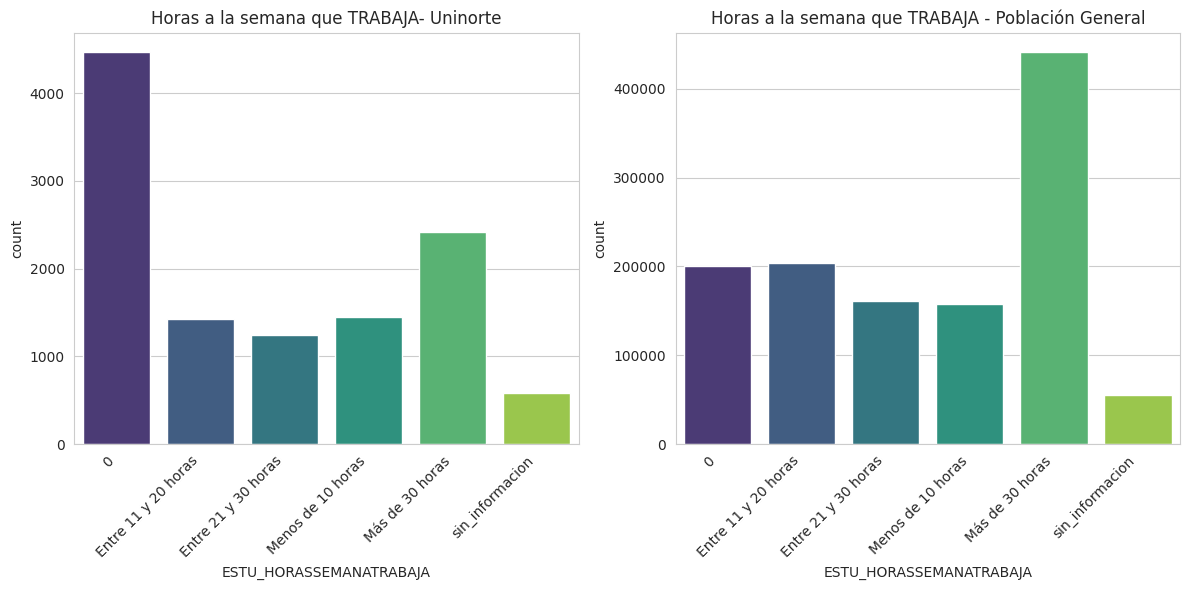

In [29]:
# Obtener las categorías únicas excluyendo nulos y convertirlas a strings
category_order = sorted(df_combined['ESTU_HORASSEMANATRABAJA'].unique())

# Crear un diccionario de colores para cada categoría
palette_dict = dict(zip(category_order, sns.color_palette("viridis", len(category_order))))

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Gráfico para Uninorte
sns.countplot(data=uninorte, x='ESTU_HORASSEMANATRABAJA', hue='ESTU_HORASSEMANATRABAJA',
              order=category_order, palette=palette_dict, ax=ax[0])
ax[0].set_title('Horas a la semana que TRABAJA- Uninorte')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha="right")  # Gira las etiquetas del eje x

# Gráfico para la población general
sns.countplot(data=df_combined, x='ESTU_HORASSEMANATRABAJA', hue='ESTU_HORASSEMANATRABAJA',
              order=category_order, palette=palette_dict, ax=ax[1])
ax[1].set_title('Horas a la semana que TRABAJA - Población General')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right")  # Gira las etiquetas del eje x

plt.tight_layout()
plt.show()

<ipython-input-14-48ff1b2f4d1a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uninorte['AÑO'] = uninorte['PERIODO'].astype(str).str[:4].astype(int)


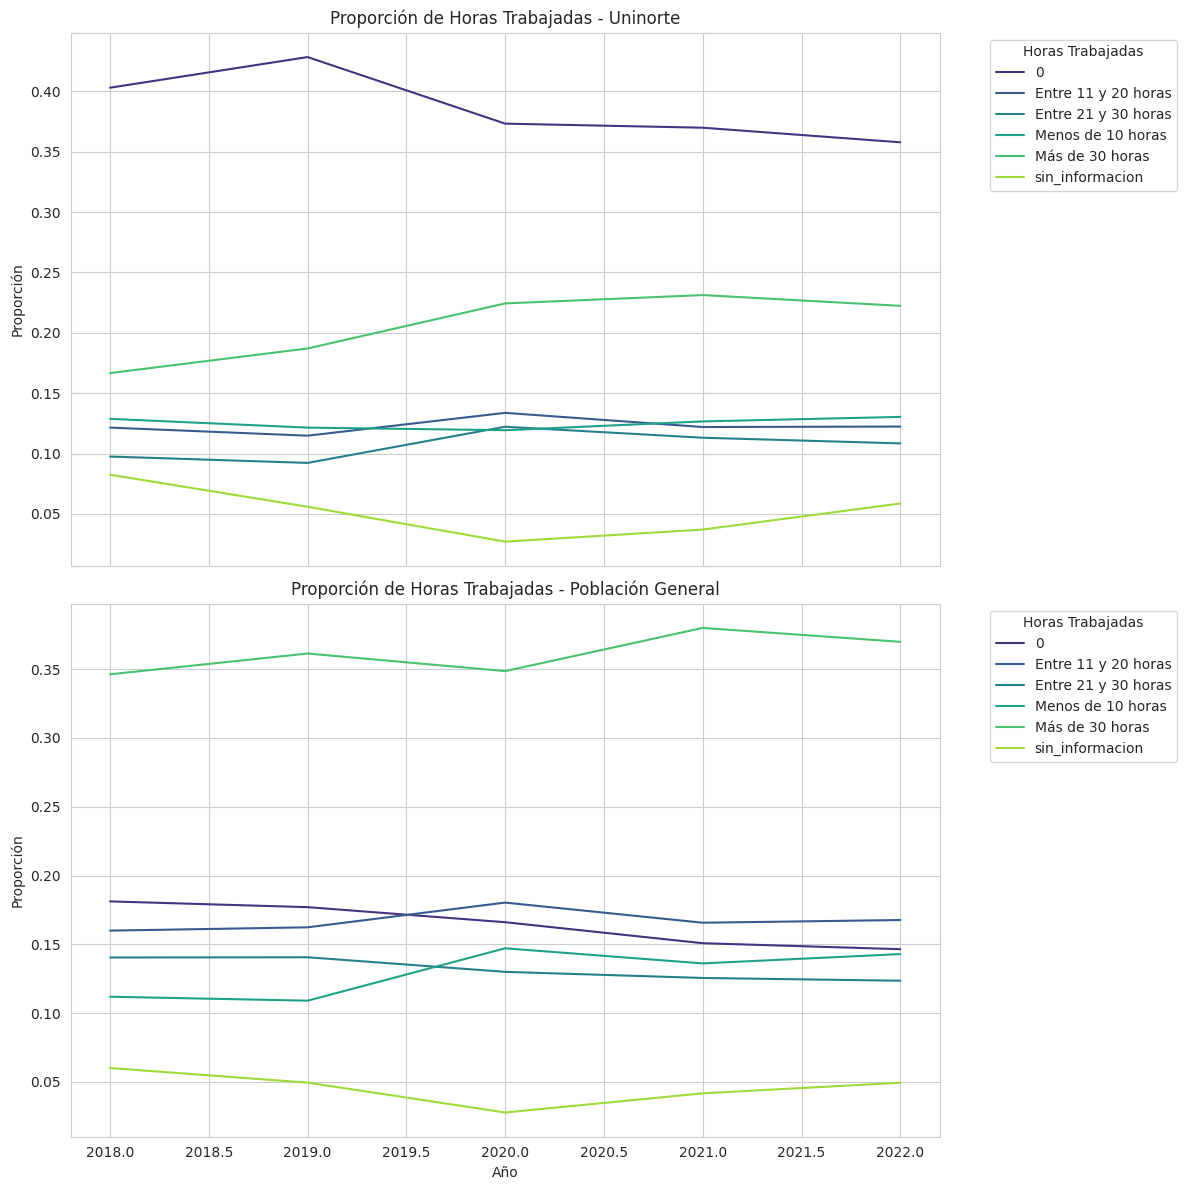

In [14]:
# Extraer el año de PERIODO
uninorte['AÑO'] = uninorte['PERIODO'].astype(str).str[:4].astype(int)
df_combined['AÑO'] = df_combined['PERIODO'].astype(str).str[:4].astype(int)

# Lista de las categorías de horas trabajadas
category_order = sorted(df_combined['ESTU_HORASSEMANATRABAJA'].dropna().unique())

# Configurar el tamaño de los gráficos
fig, ax = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Gráfico para Uninorte
uninorte_proportions = uninorte.groupby(['AÑO', 'ESTU_HORASSEMANATRABAJA']).size().unstack(fill_value=0)
uninorte_proportions = uninorte_proportions.div(uninorte_proportions.sum(axis=1), axis=0)

# Graficar cada categoría de horas trabajadas como una línea en el tiempo
for category in category_order:
    if category in uninorte_proportions.columns:
        sns.lineplot(x=uninorte_proportions.index, y=uninorte_proportions[category], label=str(category), ax=ax[0])
ax[0].set_title('Proporción de Horas Trabajadas - Uninorte')
ax[0].set_ylabel('Proporción')
ax[0].legend(title="Horas Trabajadas", bbox_to_anchor=(1.05, 1), loc='upper left')
ax[0].grid(True)

# Gráfico para la población general
general_proportions = df_combined.groupby(['AÑO', 'ESTU_HORASSEMANATRABAJA']).size().unstack(fill_value=0)
general_proportions = general_proportions.div(general_proportions.sum(axis=1), axis=0)

# Graficar cada categoría de horas trabajadas como una línea en el tiempo
for category in category_order:
    if category in general_proportions.columns:
        sns.lineplot(x=general_proportions.index, y=general_proportions[category], label=str(category), ax=ax[1])
ax[1].set_title('Proporción de Horas Trabajadas - Población General')
ax[1].set_xlabel('Año')
ax[1].set_ylabel('Proporción')
ax[1].legend(title="Horas Trabajadas", bbox_to_anchor=(1.05, 1), loc='upper left')
ax[1].grid(True)

plt.tight_layout()
plt.show()


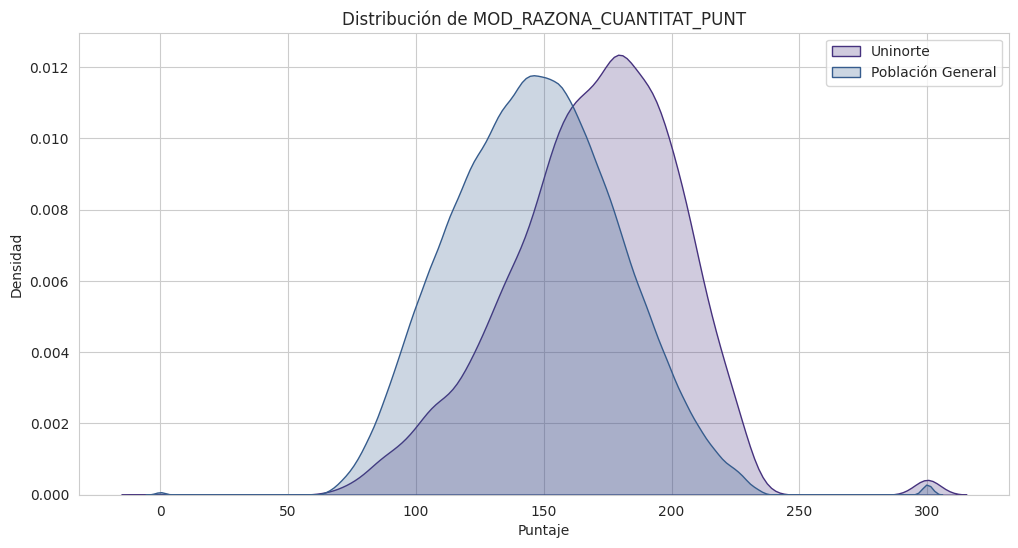

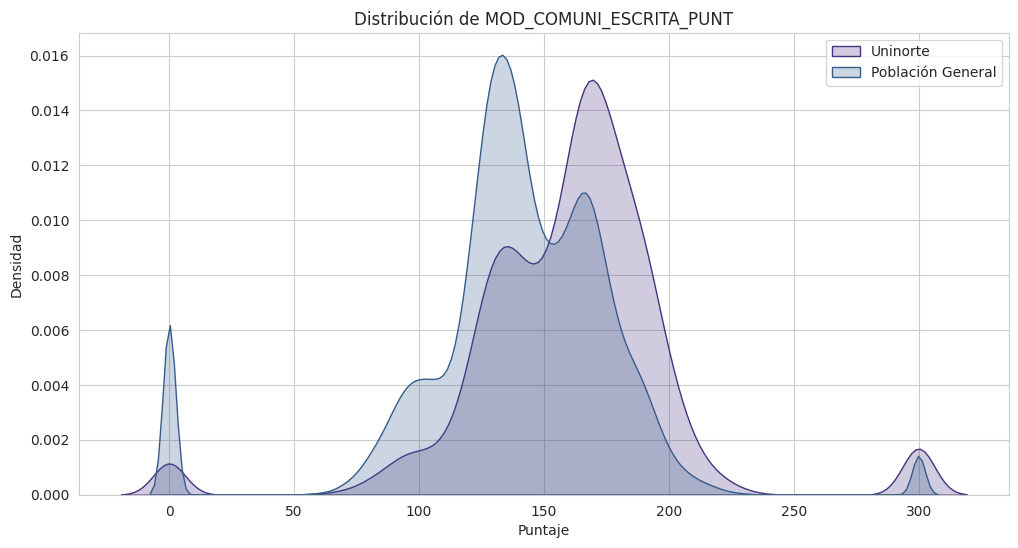

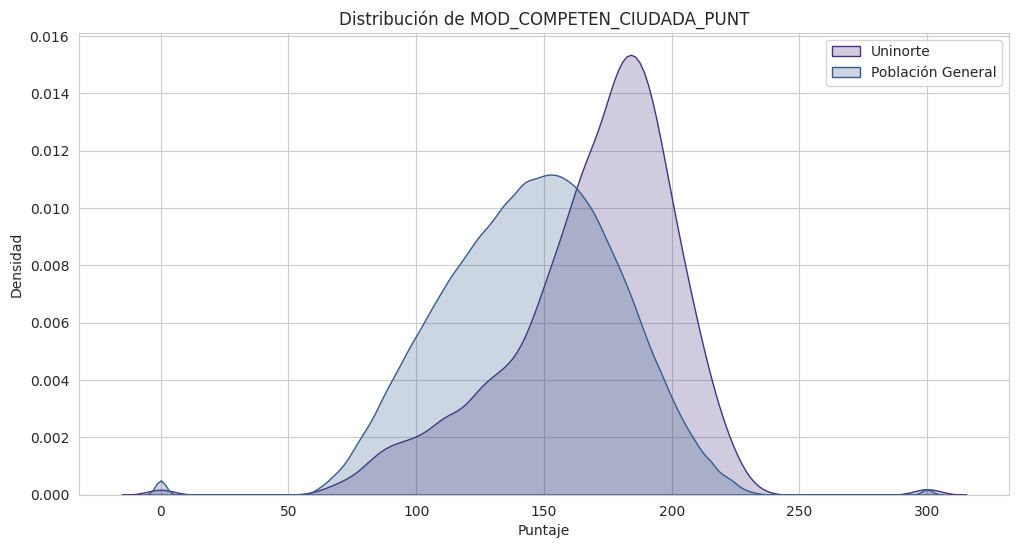

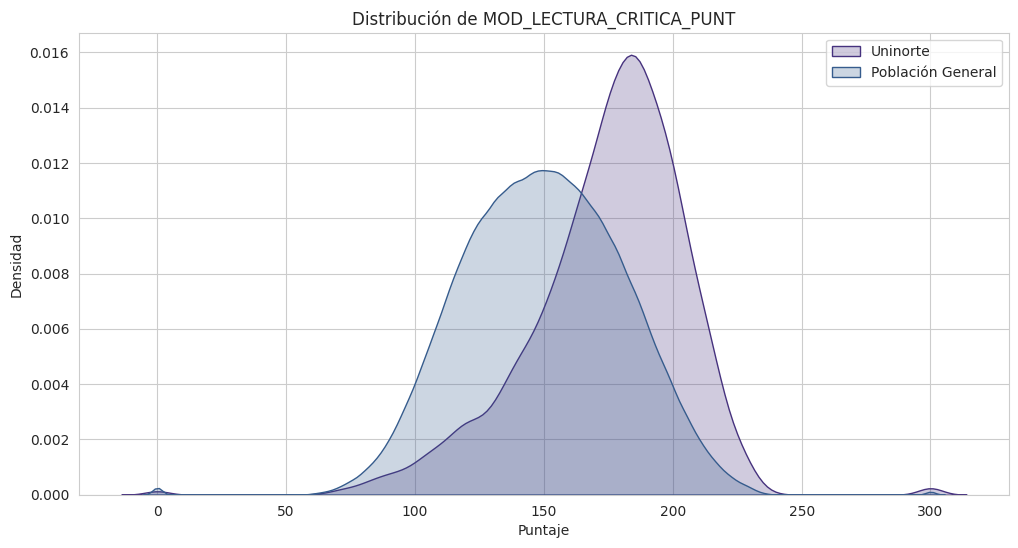

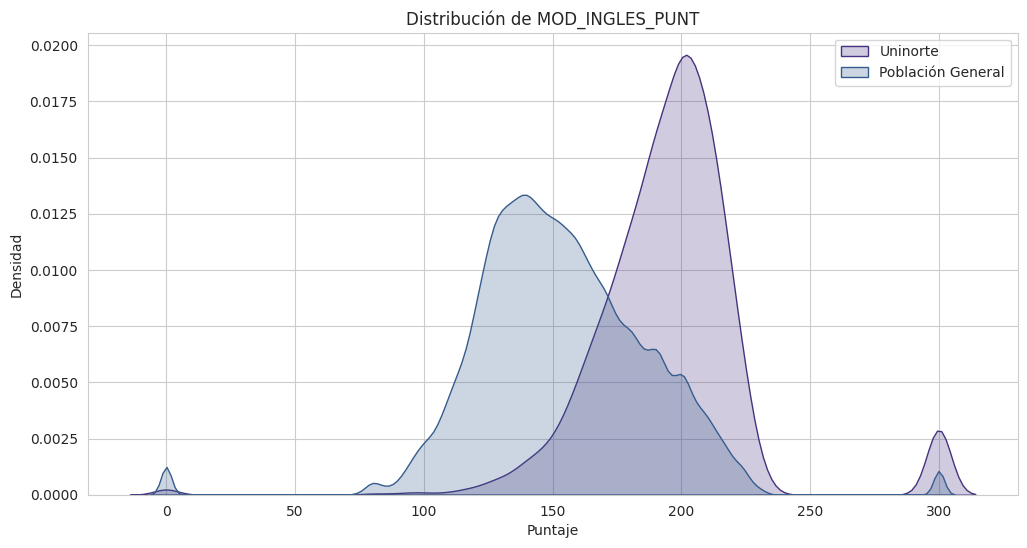

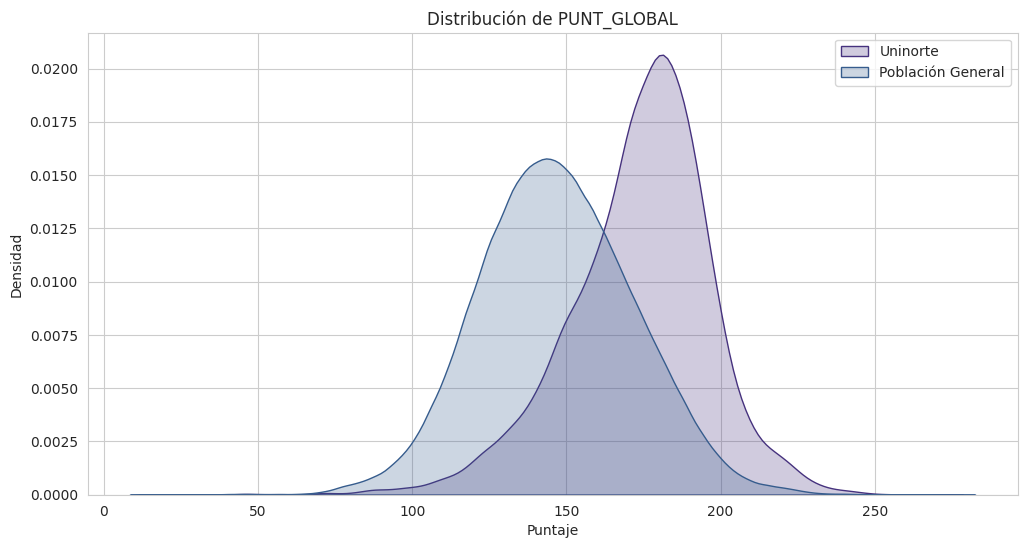

In [15]:
# Lista de las columnas de puntajes de las pruebas y del puntaje global
pruebas = [
    'MOD_RAZONA_CUANTITAT_PUNT', 'MOD_COMUNI_ESCRITA_PUNT',
    'MOD_COMPETEN_CIUDADA_PUNT', 'MOD_LECTURA_CRITICA_PUNT',
    'MOD_INGLES_PUNT', 'PUNT_GLOBAL'
]

# Iteramos sobre cada columna y generamos un gráfico KDE
for prueba in pruebas:
    plt.figure(figsize=(12, 6))
    sns.kdeplot(data=uninorte, x=prueba, label='Uninorte', fill=True)
    sns.kdeplot(data=df_combined, x=prueba, label='Población General', fill=True)
    plt.title(f'Distribución de {prueba}')
    plt.xlabel('Puntaje')
    plt.ylabel('Densidad')
    plt.legend()
    plt.show()


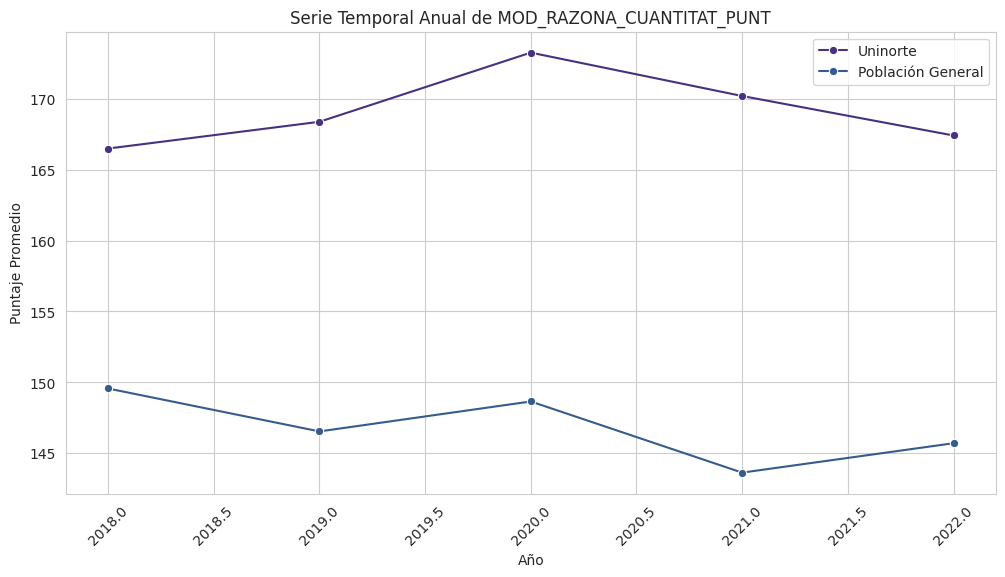

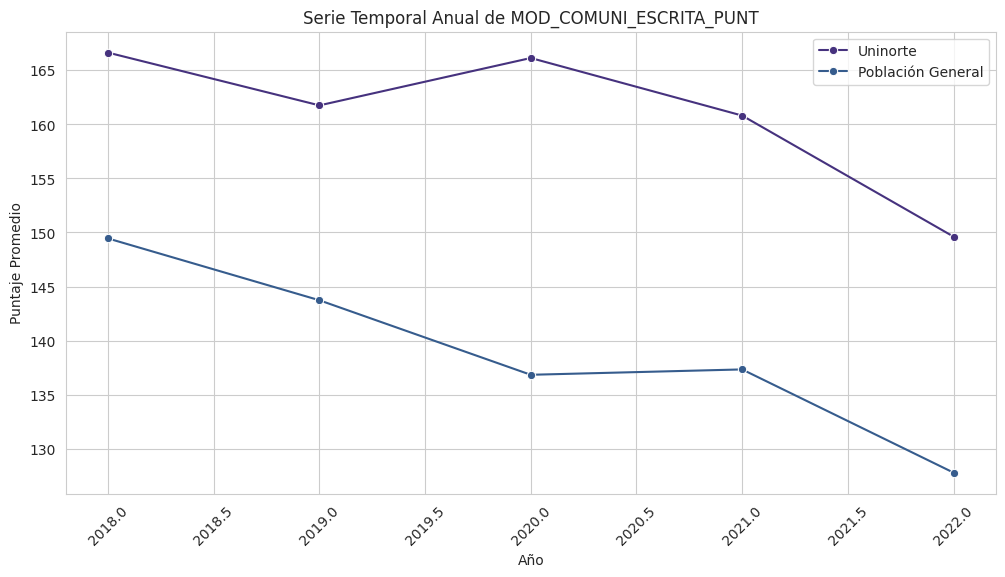

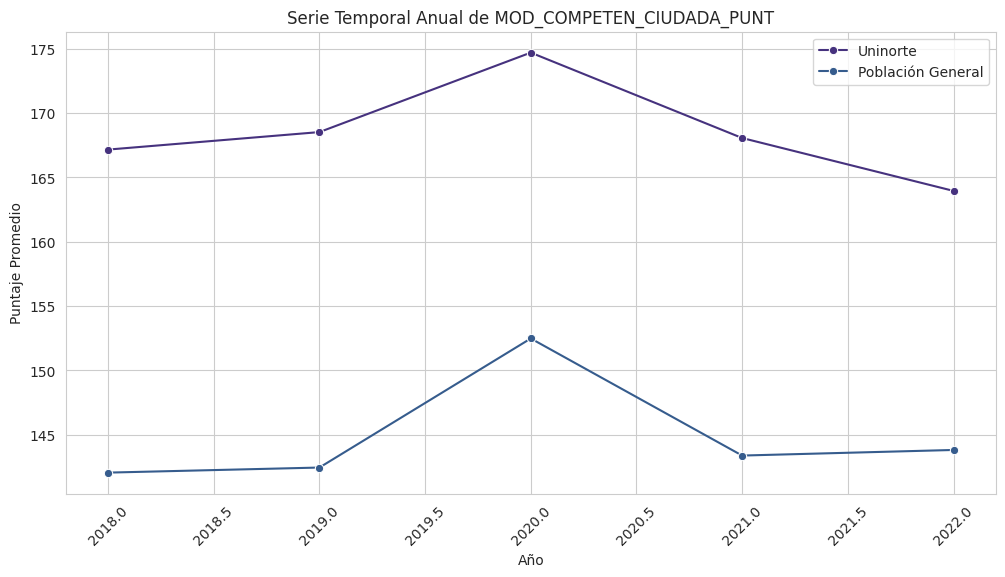

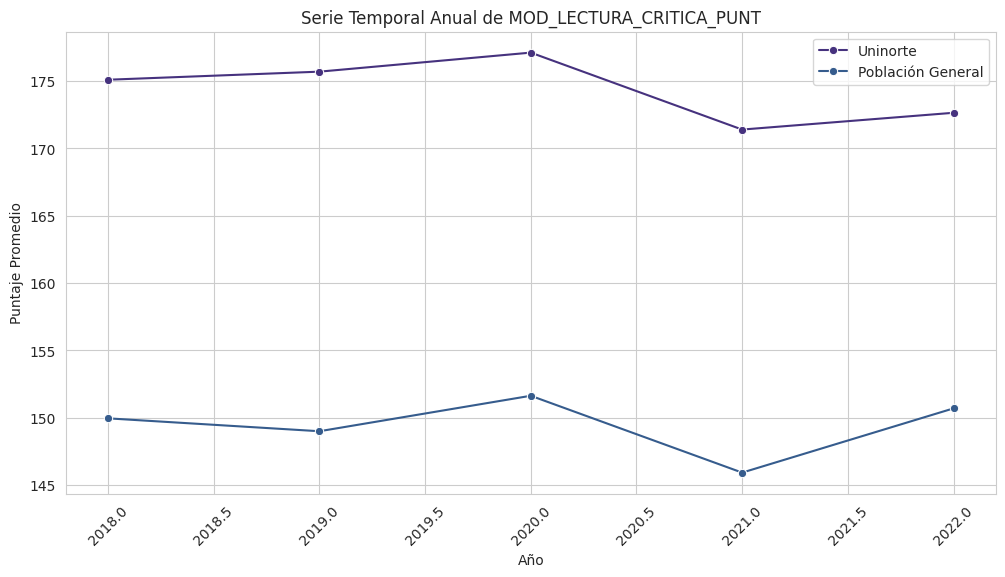

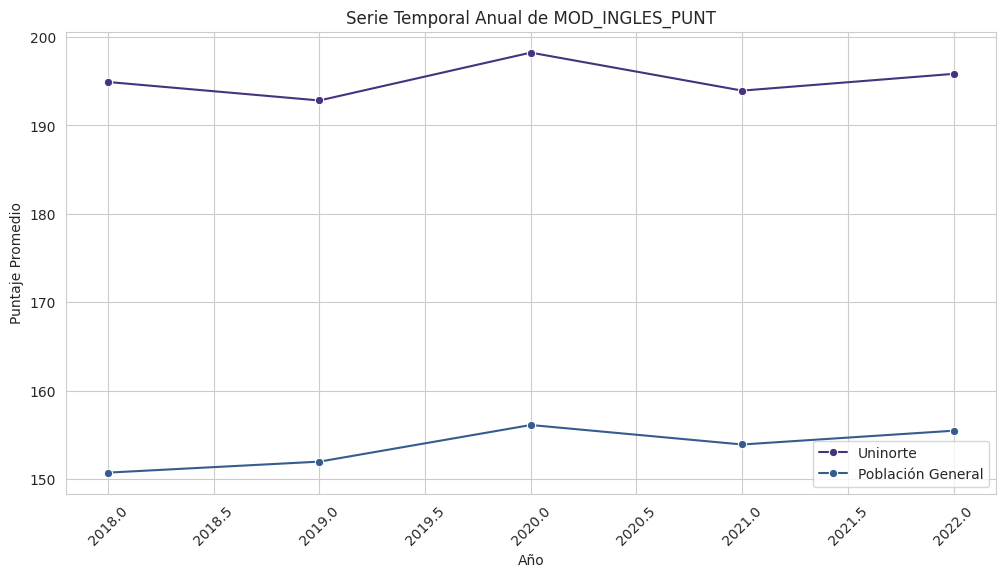

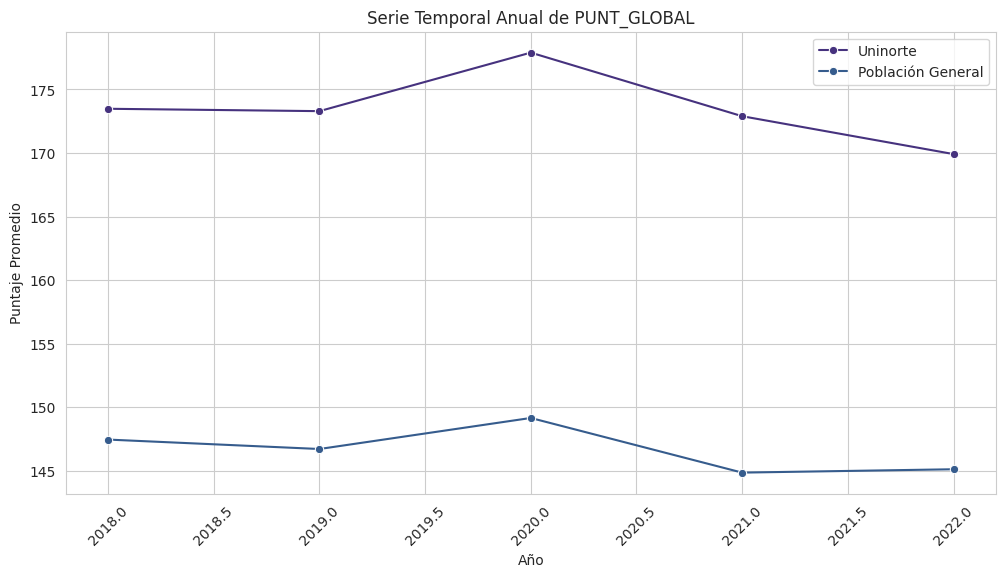

In [ ]:
# Extraer el año de PERIODO
df_combined['AÑO'] = df_combined['PERIODO'].astype(str).str[:4].astype(int)
uninorte['AÑO']= uninorte['PERIODO'].astype(str).str[:4].astype(int)


# Crear gráficos de series temporales por cada prueba
for prueba in pruebas:
    plt.figure(figsize=(12, 6))

    # Calcular promedio de puntaje por AÑO para Uninorte y población general
    uninorte_mean = uninorte.groupby('AÑO')[prueba].mean()
    general_mean = df_combined.groupby('AÑO')[prueba].mean()

    # Graficar series temporales
    sns.lineplot(data=uninorte_mean, label='Uninorte', marker='o')
    sns.lineplot(data=general_mean, label='Población General', marker='o')

    # Configuración del gráfico
    plt.title(f'Serie Temporal Anual de {prueba}')
    plt.xlabel('Año')
    plt.ylabel('Puntaje Promedio')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()



In [16]:
df_combined.columns

Index(['PERIODO', 'ESTU_CONSECUTIVO', 'ESTU_VALORMATRICULAUNIVERSIDAD',
       'ESTU_COMOCAPACITOEXAMENSB11', 'ESTU_SEMESTRECURSA',
       'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'ESTU_HORASSEMANATRABAJA',
       'INST_COD_INSTITUCION', 'INST_NOMBRE_INSTITUCION',
       'ESTU_PRGM_ACADEMICO', 'ESTU_SNIES_PRGMACADEMICO', 'GRUPOREFERENCIA',
       'ESTU_PRGM_CODMUNICIPIO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_NUCLEO_PREGRADO', 'ESTU_INST_CODMUNICIPIO',
       'ESTU_INST_DEPARTAMENTO', 'INST_CARACTER_ACADEMICO',
       'MOD_RAZONA_CUANTITAT_PUNT', 'MOD_RAZONA_CUANTITAT_DESEM',
       'MOD_LECTURA_CRITICA_PUNT', 'MOD_LECTURA_CRITICA_DESEM',
       'MOD_COMPETEN_CIUDADA_PUNT', 'MOD_COMPETEN_CIUDADA_DESEM',
       'MOD_INGLES_PUNT', 'MOD_INGLES_DESEM', 'MOD_COMUNI_ESCRITA_PUNT',
       'MOD_COMUNI_ESCRITA_DESEM', 'PUNT_GLOBAL',
       'ESTU_COD_COLE_MCPIO_TERMINO', 'ESTU_COD_DEPTO_PRESENTACION',
       'ESTU_COD_MCPIO_PRESENTACION', 'ESTU_COD_RESIDE_DEPTO',
       'ESTU_COD_RESIDE_MC

## Guardado final antes de proceder con LABEL ENCODER

In [1]:
uninorte.to_csv('uninorte.csv', index=False)
df_combined.to_csv('df_combined.csv', index=False)

NameError: name 'uninorte' is not defined

In [38]:
df_combined=pd.read_csv('df_combined.csv', low_memory=False)

In [39]:
uninorte= df_combined[df_combined['INST_NOMBRE_INSTITUCION']=='UNIVERSIDAD DEL NORTE-BARRANQUILLA']
uninorte=uninorte.reset_index()
uninorte.to_csv('uninorte.csv', index=False)

In [40]:
num_cols=df_combined.select_dtypes(include=['int','float']).columns
cat_cols=df_combined.select_dtypes(include=['object']).columns
print(num_cols)
print(cat_cols)

Index(['PERIODO', 'MOD_RAZONA_CUANTITAT_PUNT', 'MOD_RAZONA_CUANTITAT_DESEM',
       'MOD_LECTURA_CRITICA_PUNT', 'MOD_LECTURA_CRITICA_DESEM',
       'MOD_COMPETEN_CIUDADA_PUNT', 'MOD_COMPETEN_CIUDADA_DESEM',
       'MOD_INGLES_PUNT', 'MOD_COMUNI_ESCRITA_PUNT', 'PUNT_GLOBAL', 'AÑO'],
      dtype='object')
Index(['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_COMOCAPACITOEXAMENSB11',
       'ESTU_SEMESTRECURSA', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'ESTU_HORASSEMANATRABAJA', 'INST_NOMBRE_INSTITUCION',
       'ESTU_PRGM_ACADEMICO', 'GRUPOREFERENCIA', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_NUCLEO_PREGRADO', 'ESTU_INST_DEPARTAMENTO',
       'INST_CARACTER_ACADEMICO', 'MOD_INGLES_DESEM',
       'MOD_COMUNI_ESCRITA_DESEM', 'ESTU_COD_COLE_MCPIO_TERMINO',
       'ESTU_COD_DEPTO_PRESENTACION', 'ESTU_COD_MCPIO_PRESENTACION',
       'ESTU_COD_RESIDE_DEPTO', 'ESTU_COD_RESIDE_MCPIO', 'ESTU_COLE_TERMINO',
       'ESTU_DEPTO_PRESENTACION', 'ESTU_DEPTO_RESIDE',
       'ESTU_ESTADOINVESTIGACION'

In [41]:
to_str=['PERIODO', 'MOD_RAZONA_CUANTITAT_DESEM', 'MOD_LECTURA_CRITICA_DESEM','MOD_COMPETEN_CIUDADA_DESEM']
for col in to_str:
  df_combined[col]=df_combined[col].astype(str)
  uninorte[col]=uninorte[col].astype(str)

In [42]:
columns_to_drop = ['ESTU_CONSECUTIVO','ESTU_SNIES_PRGMACADEMICO','INST_COD_INSTITUCION', 'ESTU_PRGM_CODMUNICIPIO',
       'ESTU_INST_CODMUNICIPIO','ESTU_FECHANACIMIENTO']

df_combined.drop(columns_to_drop, axis=1, inplace=True)
uninorte.drop(columns_to_drop, axis=1, inplace=True)

KeyError: "['ESTU_CONSECUTIVO', 'ESTU_SNIES_PRGMACADEMICO', 'INST_COD_INSTITUCION', 'ESTU_PRGM_CODMUNICIPIO', 'ESTU_INST_CODMUNICIPIO', 'ESTU_FECHANACIMIENTO'] not found in axis"

In [43]:
num_cols=df_combined.select_dtypes(include=['int','float']).columns
cat_cols=df_combined.select_dtypes(include=['object']).columns
print(num_cols)
print(cat_cols)

Index(['MOD_RAZONA_CUANTITAT_PUNT', 'MOD_LECTURA_CRITICA_PUNT',
       'MOD_COMPETEN_CIUDADA_PUNT', 'MOD_INGLES_PUNT',
       'MOD_COMUNI_ESCRITA_PUNT', 'PUNT_GLOBAL', 'AÑO'],
      dtype='object')
Index(['PERIODO', 'ESTU_VALORMATRICULAUNIVERSIDAD',
       'ESTU_COMOCAPACITOEXAMENSB11', 'ESTU_SEMESTRECURSA',
       'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'ESTU_HORASSEMANATRABAJA',
       'INST_NOMBRE_INSTITUCION', 'ESTU_PRGM_ACADEMICO', 'GRUPOREFERENCIA',
       'ESTU_PRGM_DEPARTAMENTO', 'ESTU_NUCLEO_PREGRADO',
       'ESTU_INST_DEPARTAMENTO', 'INST_CARACTER_ACADEMICO',
       'MOD_RAZONA_CUANTITAT_DESEM', 'MOD_LECTURA_CRITICA_DESEM',
       'MOD_COMPETEN_CIUDADA_DESEM', 'MOD_INGLES_DESEM',
       'MOD_COMUNI_ESCRITA_DESEM', 'ESTU_COD_COLE_MCPIO_TERMINO',
       'ESTU_COD_DEPTO_PRESENTACION', 'ESTU_COD_MCPIO_PRESENTACION',
       'ESTU_COD_RESIDE_DEPTO', 'ESTU_COD_RESIDE_MCPIO', 'ESTU_COLE_TERMINO',
       'ESTU_DEPTO_PRESENTACION', 'ESTU_DEPTO_RESIDE',
       'ESTU_ESTADOINVESTI

In [36]:
from sklearn.preprocessing import LabelEncoder
import pickle
import numpy as np

# Crear un diccionario para guardar los encoders de cada columna
encoders = {}

# Entrenar un encoder para cada columna categórica
for columna in cat_cols:
    encoder = LabelEncoder()
    encoder.fit(df_combined[columna])
    encoders[columna] = encoder

# Guardar el diccionario de encoders
with open('/content/drive/MyDrive/tdg_datasets/SaberPRO_project_master/label_encoders_dict.pkl', 'wb') as file:
    pickle.dump(encoders, file)

In [44]:
import pickle

# Cargar el diccionario de encoders guardado
with open('/content/drive/MyDrive/tdg_datasets/SaberPRO_project_master/label_encoders_dict.pkl', 'rb') as file:
    encoders = pickle.load(file)

In [45]:
un_encoded=pd.DataFrame()

for col in list(cat_cols): # Aplicar el encoder directamente a la columna
  print(col)
  encoder = encoders[col]
  print(encoder.classes_)
  un_encoded[col] = encoder.transform(uninorte[col])

# Revisar el resultado
un_encoded.head()


PERIODO
['20183.0' '20184.0' '20194.0' '20195.0' '20196.0' '20202.0' '20203.0'
 '20212.0' '20213.0' '20222.0' '20223.0' '20225.0' '20226.0']
ESTU_VALORMATRICULAUNIVERSIDAD
['Entre 1 millón y menos de 2.5 millones'
 'Entre 2.5 millones y menos de 4 millones'
 'Entre 4 millones y menos de 5.5 millones'
 'Entre 5.5 millones y menos de 7 millones'
 'Entre 500 mil y menos de 1 millón' 'Menos de 500 mil'
 'Más de 7 millones' 'No pagó matrícula' 'sin_informacion']
ESTU_COMOCAPACITOEXAMENSB11
['No realizó ninguna prueba de preparación' 'Repasó por cuenta propia'
 'Tomó un curso de preparación' 'sin_informacion']
ESTU_SEMESTRECURSA
['1.0' '10.0' '11.0' '12.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0'
 '9.0' 'sin_informacion']
FAMI_EDUCACIONPADRE
['Educación profesional completa' 'Educación profesional incompleta'
 'Ninguno' 'No Aplica' 'No sabe' 'Postgrado' 'Primaria completa'
 'Primaria incompleta' 'Secundaria (Bachillerato) completa'
 'Secundaria (Bachillerato) incompleta' 'Técnica o tecnológ

,PERIODO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_COMOCAPACITOEXAMENSB11,ESTU_SEMESTRECURSA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_HORASSEMANATRABAJA,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,GRUPOREFERENCIA,ESTU_PRGM_DEPARTAMENTO,ESTU_NUCLEO_PREGRADO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,MOD_RAZONA_CUANTITAT_DESEM,MOD_LECTURA_CRITICA_DESEM,MOD_COMPETEN_CIUDADA_DESEM,MOD_INGLES_DESEM,MOD_COMUNI_ESCRITA_DESEM,ESTU_COD_COLE_MCPIO_TERMINO,ESTU_COD_DEPTO_PRESENTACION,ESTU_COD_MCPIO_PRESENTACION,ESTU_COD_RESIDE_DEPTO,ESTU_COD_RESIDE_MCPIO,ESTU_COLE_TERMINO,ESTU_DEPTO_PRESENTACION,ESTU_DEPTO_RESIDE,ESTU_ESTADOINVESTIGACION,ESTU_ESTUDIANTE,ESTU_GENERO,ESTU_INST_MUNICIPIO,ESTU_MCPIO_PRESENTACION,ESTU_MCPIO_RESIDE,ESTU_METODO_PRGM,ESTU_NACIONALIDAD,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_PAIS_RESIDE,ESTU_PRGM_MUNICIPIO,ESTU_PRIVADO_LIBERTAD,ESTU_TIPODOCUMENTO,ESTU_TIPODOCUMENTOSB11,FAMI_ESTRATOVIVIENDA,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,INST_ORIGEN
0,0,6,1,12,0,11,0,208,16,0,4,0,2,3,2,2,2,4,1,1023,24,148,24,1041,18248,6,4,0,0,0,5,13,84,2,20,0,0,0,1,0,20,15,0,0,0,5,1,1,1,1,1
1,0,6,1,12,5,5,4,208,16,0,4,0,2,3,2,2,1,4,2,1023,24,148,24,1041,18248,6,4,0,0,1,5,13,84,2,20,0,0,0,1,0,20,15,0,0,5,5,1,1,1,1,1
2,0,6,0,12,6,0,0,208,16,0,4,0,2,3,2,2,2,4,1,1023,24,148,24,1041,22563,6,4,0,0,1,5,13,84,2,20,0,0,0,1,0,20,15,0,0,0,5,1,1,1,1,1
3,0,6,0,12,0,10,1,208,16,0,4,0,2,3,2,1,1,4,1,1023,24,148,24,1041,16344,6,4,0,0,1,5,13,84,2,20,0,0,0,1,0,20,15,0,0,5,4,1,1,1,1,1
4,0,6,0,12,12,12,5,208,16,0,4,0,2,3,2,2,1,3,1,1023,24,148,24,1041,18175,6,4,0,0,1,5,13,84,2,20,0,0,1,1,0,20,15,0,0,0,7,2,2,2,2,1


In [46]:
un_encoded.to_csv('un_encoded.csv', index=False)

In [47]:
general_encoded=pd.DataFrame()

for col in list(cat_cols): # Aplicar el encoder directamente a la columna
  print(col)
  encoder = encoders[col]
  print(encoder.classes_)
  general_encoded[col] = encoder.transform(df_combined[col])

# Revisar el resultado
general_encoded.head()

PERIODO
['20183.0' '20184.0' '20194.0' '20195.0' '20196.0' '20202.0' '20203.0'
 '20212.0' '20213.0' '20222.0' '20223.0' '20225.0' '20226.0']
ESTU_VALORMATRICULAUNIVERSIDAD
['Entre 1 millón y menos de 2.5 millones'
 'Entre 2.5 millones y menos de 4 millones'
 'Entre 4 millones y menos de 5.5 millones'
 'Entre 5.5 millones y menos de 7 millones'
 'Entre 500 mil y menos de 1 millón' 'Menos de 500 mil'
 'Más de 7 millones' 'No pagó matrícula' 'sin_informacion']
ESTU_COMOCAPACITOEXAMENSB11
['No realizó ninguna prueba de preparación' 'Repasó por cuenta propia'
 'Tomó un curso de preparación' 'sin_informacion']
ESTU_SEMESTRECURSA
['1.0' '10.0' '11.0' '12.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0'
 '9.0' 'sin_informacion']
FAMI_EDUCACIONPADRE
['Educación profesional completa' 'Educación profesional incompleta'
 'Ninguno' 'No Aplica' 'No sabe' 'Postgrado' 'Primaria completa'
 'Primaria incompleta' 'Secundaria (Bachillerato) completa'
 'Secundaria (Bachillerato) incompleta' 'Técnica o tecnológ

,PERIODO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_COMOCAPACITOEXAMENSB11,ESTU_SEMESTRECURSA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_HORASSEMANATRABAJA,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,GRUPOREFERENCIA,ESTU_PRGM_DEPARTAMENTO,ESTU_NUCLEO_PREGRADO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,MOD_RAZONA_CUANTITAT_DESEM,MOD_LECTURA_CRITICA_DESEM,MOD_COMPETEN_CIUDADA_DESEM,MOD_INGLES_DESEM,MOD_COMUNI_ESCRITA_DESEM,ESTU_COD_COLE_MCPIO_TERMINO,ESTU_COD_DEPTO_PRESENTACION,ESTU_COD_MCPIO_PRESENTACION,ESTU_COD_RESIDE_DEPTO,ESTU_COD_RESIDE_MCPIO,ESTU_COLE_TERMINO,ESTU_DEPTO_PRESENTACION,ESTU_DEPTO_RESIDE,ESTU_ESTADOINVESTIGACION,ESTU_ESTUDIANTE,ESTU_GENERO,ESTU_INST_MUNICIPIO,ESTU_MCPIO_PRESENTACION,ESTU_MCPIO_RESIDE,ESTU_METODO_PRGM,ESTU_NACIONALIDAD,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_PAIS_RESIDE,ESTU_PRGM_MUNICIPIO,ESTU_PRIVADO_LIBERTAD,ESTU_TIPODOCUMENTO,ESTU_TIPODOCUMENTOSB11,FAMI_ESTRATOVIVIENDA,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,INST_ORIGEN
0,6,8,3,12,8,1,1,205,0,12,4,17,2,3,2,2,1,2,1,1106,1,3,24,1042,26377,12,4,0,0,0,5,18,73,2,20,0,2,2,2,2,20,15,0,0,6,0,0,1,1,1,2
1,6,8,3,12,11,11,2,205,0,12,4,17,2,3,1,2,2,1,2,1106,1,3,24,1099,26377,12,4,0,0,0,5,18,875,2,20,0,2,2,2,2,20,15,0,0,6,1,0,1,1,1,2
2,6,8,3,12,1,11,4,205,0,12,4,17,2,3,2,2,1,2,1,1106,1,3,24,1041,26377,12,4,0,0,1,5,18,84,2,20,0,2,2,2,2,20,15,0,0,6,1,0,0,0,0,2
3,6,8,3,12,7,7,3,205,0,12,4,17,2,3,0,0,1,0,1,1106,24,149,24,1042,26377,6,4,0,0,1,5,9,73,2,20,0,2,2,2,2,20,15,0,0,6,0,2,1,1,2,2
4,6,5,1,10,10,10,1,205,0,12,4,17,2,3,1,2,2,2,4,1106,1,3,24,1041,26377,12,4,0,0,0,5,18,84,2,20,0,0,0,1,0,20,15,0,0,5,0,0,1,1,1,2


In [48]:
general_encoded.to_csv('general_encoded.csv', index=False)

In [49]:
df_combined.to_csv('df_combined.csv', index=False)
uninorte.to_csv('uninorte.csv', index=False)

In [15]:
df_combined[num_cols].head()

,MOD_RAZONA_CUANTITAT_PUNT,MOD_LECTURA_CRITICA_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_INGLES_PUNT,MOD_COMUNI_ESCRITA_PUNT,PUNT_GLOBAL,AÑO
0,171.0,171.0,154.0,169.0,131.0,159.0,2020
1,149.0,166.0,158.0,134.0,165.0,154.0,2020
2,159.0,177.0,153.0,161.0,135.0,157.0,2020
3,118.0,124.0,131.0,101.0,119.0,119.0,2020
4,149.0,161.0,191.0,167.0,0.0,134.0,2020


Evaluo nulos y dado que el porcentaje de nulos es muy bajo respecto al total, proceso a eliminarlos.

Evito utilizar el iterative imputer para evitar luego fuga de datos cuando quiera entrenar modelos.

In [50]:
num_data= df_combined[num_cols]

for col in num_cols:
 n_miss = num_data[col].isnull().sum()
 perc = n_miss / num_data.shape[0] * 100
 print((col, n_miss, perc))

('MOD_RAZONA_CUANTITAT_PUNT', 0, 0.0)
('MOD_LECTURA_CRITICA_PUNT', 0, 0.0)
('MOD_COMPETEN_CIUDADA_PUNT', 0, 0.0)
('MOD_INGLES_PUNT', 114, 0.009340036311439414)
('MOD_COMUNI_ESCRITA_PUNT', 7403, 0.6065288492419824)
('PUNT_GLOBAL', 103, 0.008438804737528593)
('AÑO', 0, 0.0)


In [51]:
num_un= uninorte[num_cols]

for col in num_cols:
 n_miss = num_data[col].isnull().sum()
 perc = n_miss / num_data.shape[0] * 100
 print((col, n_miss, perc))

('MOD_RAZONA_CUANTITAT_PUNT', 0, 0.0)
('MOD_LECTURA_CRITICA_PUNT', 0, 0.0)
('MOD_COMPETEN_CIUDADA_PUNT', 0, 0.0)
('MOD_INGLES_PUNT', 114, 0.009340036311439414)
('MOD_COMUNI_ESCRITA_PUNT', 7403, 0.6065288492419824)
('PUNT_GLOBAL', 103, 0.008438804737528593)
('AÑO', 0, 0.0)


# AHORA HAY QUE CONCATENARLE LAS COLUMNAS NUMERICAS

In [29]:
un_encoded=pd.read_csv('un_encoded.csv')
general_encoded=pd.read_csv('general_encoded.csv')

In [52]:
# Concatenar `num_un` con `un_encoded`
un_encoded = pd.concat([un_encoded, num_un], axis=1)

# Concatenar `num_data` con `general_encoded`
general_encoded = pd.concat([general_encoded, num_data], axis=1)


In [56]:
print(un_encoded.isnull().sum().sum())
print(un_encoded.shape)
un_encoded.dropna(inplace=True)
un_encoded.reset_index(drop=True, inplace=True)
print(un_encoded.isnull().sum().sum())
print(un_encoded.shape)


0

In [57]:
print(general_encoded.isnull().sum().sum())
print(general_encoded.shape)
general_encoded.dropna(inplace=True)
general_encoded.reset_index(drop=True, inplace=True)
print(general_encoded.isnull().sum().sum())
print(general_encoded.shape)

7620
(1220552, 58)
0
(1212937, 58)


In [59]:
general_encoded.to_csv('general_encoded.csv', index=False)
un_encoded.to_csv('un_encoded.csv', index=False)

## Análisis de correspondencia multiple

In [62]:
for col in cat_cols:
    general_encoded[col] = general_encoded[col].astype('category')
    un_encoded[col] = un_encoded[col].astype('category')

In [63]:
import prince
import matplotlib.pyplot as plt

# Filtrar solo las columnas categóricas en el tipo correcto
df_categorical = general_encoded[cat_cols]

# Aplicar MCA
mca = prince.MCA(n_components=10)
mca = mca.fit(df_categorical)

# Graficar los primeros dos componentes del MCA
mca.plot_coordinates(X=df_categorical, show_row_points=False, show_column_labels=True)
plt.title('Análisis de Correspondencia Múltiple (MCA)')
plt.show()


ModuleNotFoundError: No module named 'prince'

In [ ]:
import prince

# Seleccionar solo las variables categóricas y llenar nulos con una categoría temporal
categorical_cols = df_combined.select_dtypes(include=['object']).columns
df_categorical = df_combined[categorical_cols]

# Ajustar el MCA sin especificar el número de componentes para capturar toda la inercia posible
mca = prince.MCA()
mca = mca.fit(df_categorical)

# Obtener la inercia explicada por cada componente
explained_inertia = mca.explained_inertia_

# Calcular la inercia explicada acumulada
cumulative_inertia = np.cumsum(explained_inertia)
